# CARGA DE LIBRERÍAS

In [64]:
import gdown
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from random import choice, randint, uniform
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay

# CARGA DEL DATASET

In [38]:
file_id = '1T6nhh8AzPe3TZH03z8uIHLZ9XiZ--oUg'
output = 'Ddos.csv'

# Descargar el archivo
gdown.download(f'https://drive.google.com/uc?id={file_id}&confirm=t', output, quiet=False)

# Cargar el CSV
df = pd.read_csv(output)
df.head()

Downloading...
From: https://drive.google.com/uc?id=1T6nhh8AzPe3TZH03z8uIHLZ9XiZ--oUg&confirm=t
To: /content/Ddos.csv
100%|██████████| 358M/358M [00:02<00:00, 151MB/s]


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

In [159]:
file_id = '1ogWBLwrF9m7g7LcOdgvZ7nPs2P0bh4uX'
output = 'SDN-DDoS_Traffic_Dataset.csv'

# Descargar el archivo
gdown.download(f'https://drive.google.com/uc?id={file_id}&confirm=t', output, quiet=False)

# Cargar el CSV
df2 = pd.read_csv(output)
df2.head()


Downloading...
From: https://drive.google.com/uc?id=1ogWBLwrF9m7g7LcOdgvZ7nPs2P0bh4uX&confirm=t
To: /content/SDN-DDoS_Traffic_Dataset.csv
100%|██████████| 204M/204M [00:01<00:00, 126MB/s]


,switch,host,src_ip,dst_ip,pkt_count,byte_count,duration,duration_nsec,tot_duration,flows,...,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,delay,jitter,packet_loss_rate,label
0,10,23,10.0.0.17,10.0.0.14,76411,689600385,331,261597151,1.058522e+10,7,...,3,44721489,59528897,19662,6719,10363,96.230855,5.658548,2.994103,1
1,11,23,10.0.0.22,10.0.0.21,89043,994428451,1455,717489475,1.787452e+10,11,...,3,17090261,49017915,3780,16735,2077,98.699707,11.251787,3.106546,0
2,5,11,10.0.0.12,10.0.0.8,184943,432710323,71,719260236,1.196684e+10,11,...,3,44053439,110946853,10365,17183,13339,89.542596,11.306913,4.055693,0
3,6,4,10.0.0.16,10.0.0.10,137786,623653042,2520,825085778,5.273923e+09,4,...,3,9709880,633368255,1003,6876,14905,61.076879,0.890531,0.317505,1
4,3,18,10.0.0.8,10.0.0.14,231543,1023396293,488,805586380,6.316448e+10,5,...,1,16546692,407867647,10324,14634,13281,45.331949,19.911099,0.050583,1


In [143]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   switch            1048575 non-null  int64  
 1   host              1048575 non-null  int64  
 2   src_ip            1048575 non-null  object 
 3   dst_ip            1048575 non-null  object 
 4   pkt_count         1048575 non-null  int64  
 5   byte_count        1048575 non-null  int64  
 6   duration          1048575 non-null  int64  
 7   duration_nsec     1048575 non-null  int64  
 8   tot_duration      1048575 non-null  float64
 9   flows             1048575 non-null  int64  
 10  packet_per_massg  1048575 non-null  int64  
 11  pktper_flow       1048575 non-null  float64
 12  byte_per_flow     1048575 non-null  float64
 13  pkt_rate          1048575 non-null  float64
 14  pair_flow         1048575 non-null  int64  
 15  Protocol          1048575 non-null  object 
 16  

In [144]:
file_id = '1LbJz3syQFfyhwWAlTVm7McseW_FfvwJb'
output = 'DDoS_dataset.csv'

# Descargar el archivo
gdown.download(f'https://drive.google.com/uc?id={file_id}&confirm=t', output, quiet=False)

# Cargar el CSV
df3 = pd.read_csv(output)
df3.head()

Downloading...
From: https://drive.google.com/uc?id=1LbJz3syQFfyhwWAlTVm7McseW_FfvwJb&confirm=t
To: /content/DDoS_dataset.csv
100%|██████████| 37.7M/37.7M [00:00<00:00, 86.7MB/s]


,Highest Layer,Transport Layer,Source IP,Dest IP,Source Port,Dest Port,Packet Length,Packets/Time,target
0,ARP,UDP,1,192.168.1.1,0,0,60,92.8,1
1,ARP,UDP,0,192.168.1.10,0,0,42,92.9,0
2,ARP,UDP,1,192.168.1.1,0,0,60,362.8,1
3,ARP,UDP,0,192.168.1.12,0,0,42,362.8,0
4,ARP,UDP,1,192.168.1.1,0,0,60,364.3,1


In [145]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852585 entries, 0 to 852584
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Highest Layer    852585 non-null  object 
 1   Transport Layer  852585 non-null  object 
 2   Source IP        852585 non-null  int64  
 3   Dest IP          852585 non-null  object 
 4   Source Port      852585 non-null  int64  
 5   Dest Port        852585 non-null  int64  
 6   Packet Length    852585 non-null  int64  
 7   Packets/Time     852585 non-null  float64
 8   target           852585 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 58.5+ MB


# DATOS A USAR

In [53]:
columnas_utiles = [
    'Dst Port',             # Puerto de destino
    'Protocol',             # Protocolo
    'Flow Duration',        # Duración del flujo
    'Tot Fwd Pkts',         # Total de paquetes enviados
    'Tot Bwd Pkts',         # Total de paquetes recibidos
    'TotLen Fwd Pkts',      # Longitud total de paquetes enviados
    'Fwd Pkt Len Mean',     # Longitud promedio de paquetes enviados
    'Flow Pkts/s',          # Paquetes por segundo
    'Label'                 # Etiqueta (Benign, Ataque, etc.)
]

DATOS DE ESTUDIO

In [74]:
data = df[columnas_utiles].copy()

# Eliminar valores infinitos y/o Nan
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

#Asignar forma binaria a la etiqueta label, 0 = "Bening" - 1= "SSH-Bruteforce" ó "FTP-BruteForce"

data['Label'] = data['Label'].map({
    'Benign': 0,
    'FTP-BruteForce': 1,
    'SSH-Bruteforce': 1
})

print(f"Dimensión del dataset reducido: {data.shape}")
print("\nPrimeras filas del dataset:")
display(data.head())

Dimensión del dataset reducido: (1044751, 9)

Primeras filas del dataset:


,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,Fwd Pkt Len Mean,Flow Pkts/s,Label
0,0,0,112641719,3,0,0,0.000000,0.026633,0
1,0,0,112641466,3,0,0,0.000000,0.026633,0
2,0,0,112638623,3,0,0,0.000000,0.026634,0
3,22,6,6453966,15,10,1239,82.600000,3.873587,0
4,22,6,8804066,14,11,1143,81.642857,2.839597,0


# ANÁLISIS DEL DATASET

**Distribución de clases**

Distribución de clases:
0 - Benignos: 663808 registros (63.54%)
1 - Ataques: 380943 registros (36.46%)


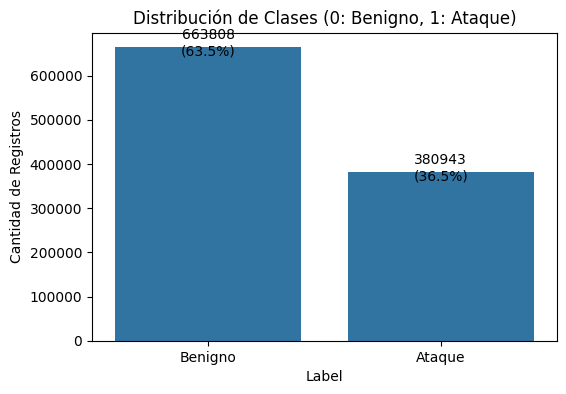

In [6]:
# Conteo de registros por clase
conteo_clases = data['Label'].value_counts()

# Porcentaje de distribución
porcentaje_clases = data['Label'].value_counts(normalize=True) * 100

# Mostrar resultados
print("Distribución de clases:")
print(f"0 - Benignos: {conteo_clases[0]} registros ({porcentaje_clases[0]:.2f}%)")
print(f"1 - Ataques: {conteo_clases[1]} registros ({porcentaje_clases[1]:.2f}%)")

# Visualización
plt.figure(figsize=(6, 4))
sns.countplot(x='Label', data=data)
plt.title('Distribución de Clases (0: Benigno, 1: Ataque)')
plt.xticks([0, 1], ['Benigno', 'Ataque'])
plt.ylabel('Cantidad de Registros')

# Agregar etiquetas con los valores
for i, count in enumerate(conteo_clases):
    plt.text(i, count + 10000, f"{count}\n({porcentaje_clases[i]:.1f}%)",
             ha='center', va='center')

plt.show()

**Matriz de correlación**

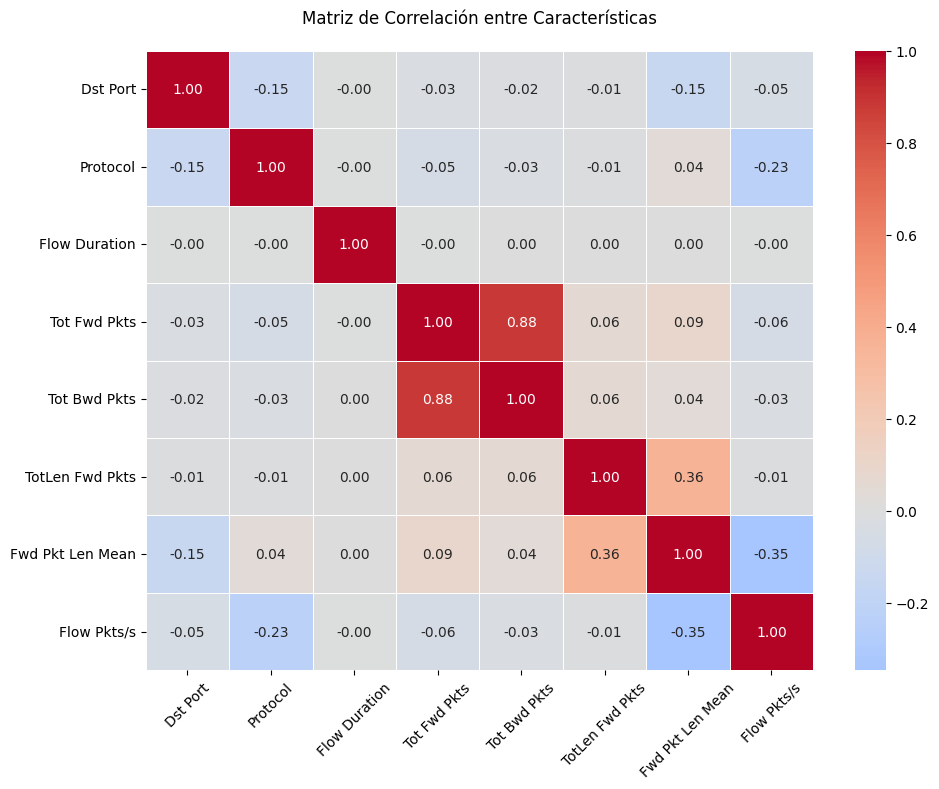

In [7]:
# Calcular matriz de correlación (excluyendo la columna Label)
corr_matrix = data.drop('Label', axis=1).corr()

# Visualización
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            linewidths=0.5,
            annot_kws={"size": 10})

plt.title('Matriz de Correlación entre Características', pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**Análisis de Valores Extremos (Outliers)**

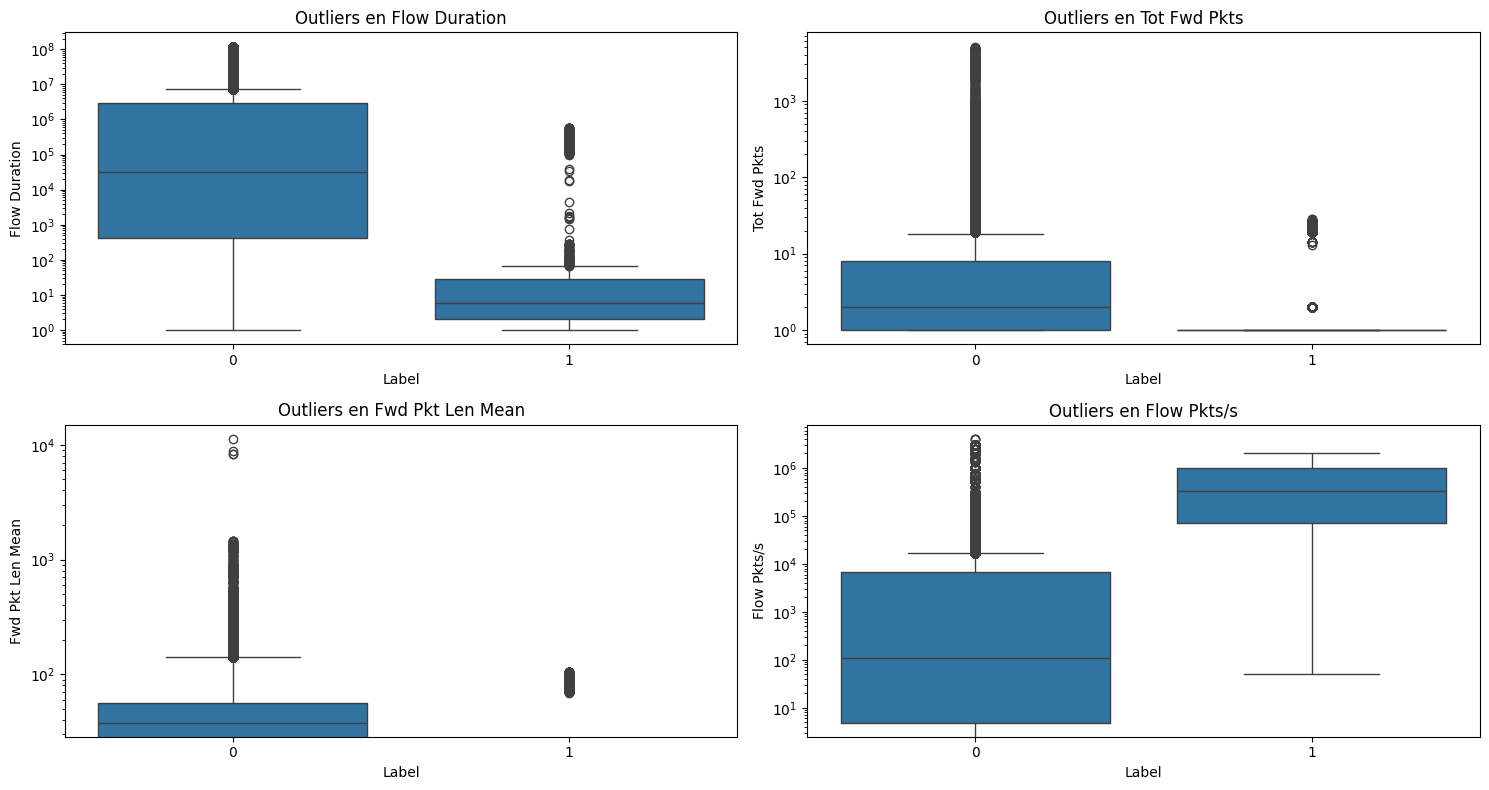

In [13]:
# Boxplots para detectar outliers en características clave
plt.figure(figsize=(15, 8))
features_to_plot = ['Flow Duration', 'Tot Fwd Pkts', 'Fwd Pkt Len Mean', 'Flow Pkts/s']

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Label', y=feature, data=data)
    plt.title(f'Outliers en {feature}')
    plt.yscale('log')  # Escala logarítmica para mejor visualización
plt.tight_layout()
plt.show()

**Análisis de protocolos y puertos**

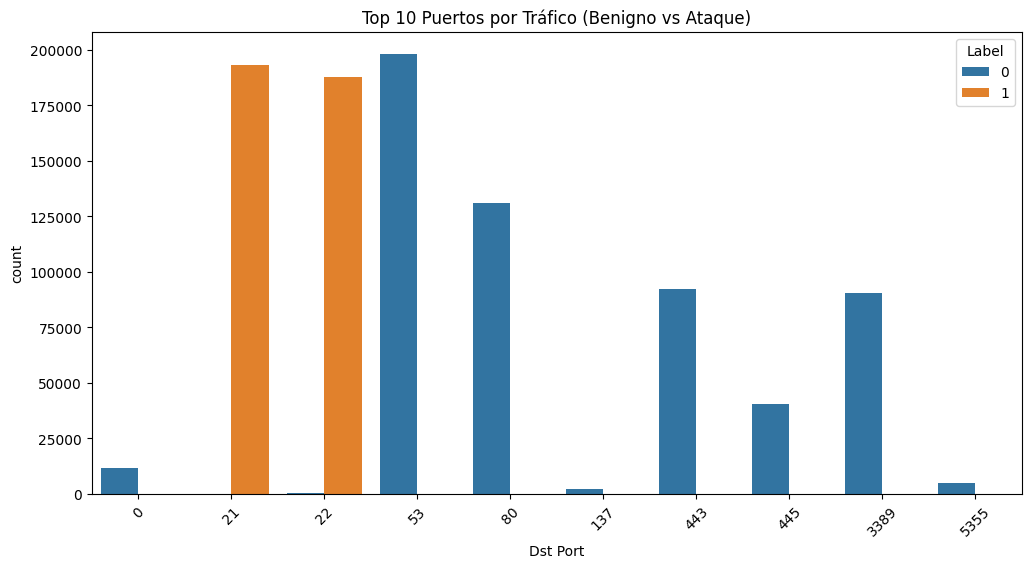

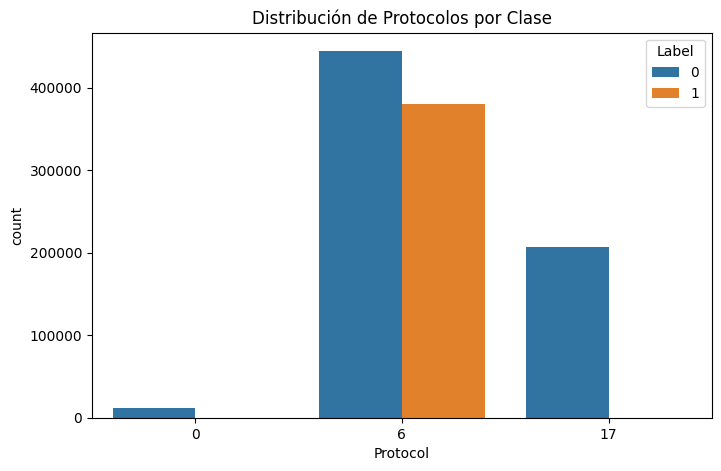

In [14]:
# Análisis de puertos destino más comunes
plt.figure(figsize=(12, 6))
top_ports = data['Dst Port'].value_counts().nlargest(10).index
sns.countplot(x='Dst Port', hue='Label', data=data[data['Dst Port'].isin(top_ports)])
plt.title('Top 10 Puertos por Tráfico (Benigno vs Ataque)')
plt.xticks(rotation=45)
plt.show()

# Distribución de protocolos
plt.figure(figsize=(8, 5))
sns.countplot(x='Protocol', hue='Label', data=data)
plt.title('Distribución de Protocolos por Clase')
plt.show()

** Tiempo de Flujo vs Tráfico**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


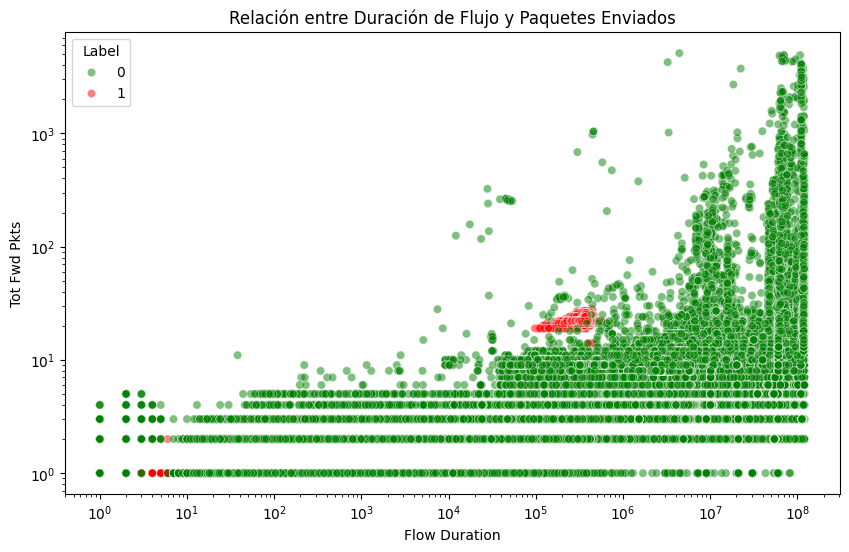

In [12]:
# Relación entre duración y paquetes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Flow Duration', y='Tot Fwd Pkts', hue='Label',
                data=data, alpha=0.5, palette=['green', 'red'])
plt.xscale('log')
plt.yscale('log')
plt.title('Relación entre Duración de Flujo y Paquetes Enviados')
plt.show()

**Análisis de tasas de paquetes**

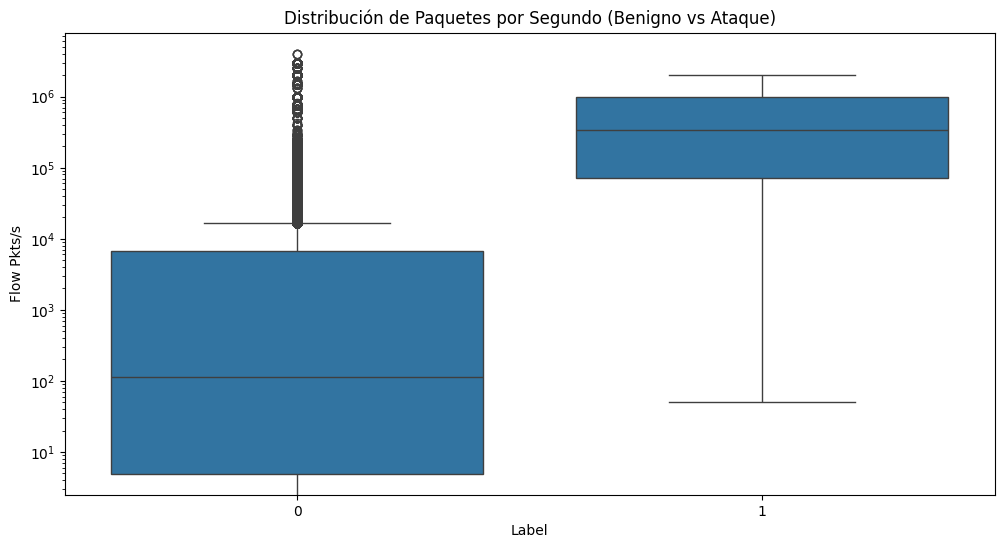

In [15]:
# Comparación de tasas de paquetes
plt.figure(figsize=(12, 6))
sns.boxplot(x='Label', y='Flow Pkts/s', data=data)
plt.yscale('log')
plt.title('Distribución de Paquetes por Segundo (Benigno vs Ataque)')
plt.show()

# CORRECIONES A LOS DATOS

In [75]:
# Eliminar duplicados (si existen)
data = data.drop_duplicates()

**Dataset corregido**

In [76]:
print("Resumen actual del dataset:")
print(f"- Dimensiones: {data.shape}")
print(f"- Columnas restantes: {list(data.columns)}")
print(f"- Valores nulos: {data.isnull().sum().sum()}")
print(f"- Balance de clases:\n{data['Label'].value_counts(normalize=True)}")

Resumen actual del dataset:
- Dimensiones: (584642, 9)
- Columnas restantes: ['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'Fwd Pkt Len Mean', 'Flow Pkts/s', 'Label']
- Valores nulos: 0
- Balance de clases:
Label
0    0.844558
1    0.155442
Name: proportion, dtype: float64


**PARTICIÓN DEL DATASET**

In [77]:
X = data.drop('Label', axis=1)
y = data['Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print(f"\nPartición final:")
print(f"Train: {X_train.shape} ({len(y_train[y_train==0])/len(y_train):.1%} benigno)")
print(f"Test: {X_test.shape} ({len(y_test[y_test==0])/len(y_test):.1%} benigno)")


Partición final:
Train: (438481, 8) (84.5% benigno)
Test: (146161, 8) (84.5% benigno)


# ENTRENAMIENTO DEL MODELO

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    123441
           1       1.00      1.00      1.00     22720

    accuracy                           1.00    146161
   macro avg       1.00      1.00      1.00    146161
weighted avg       1.00      1.00      1.00    146161



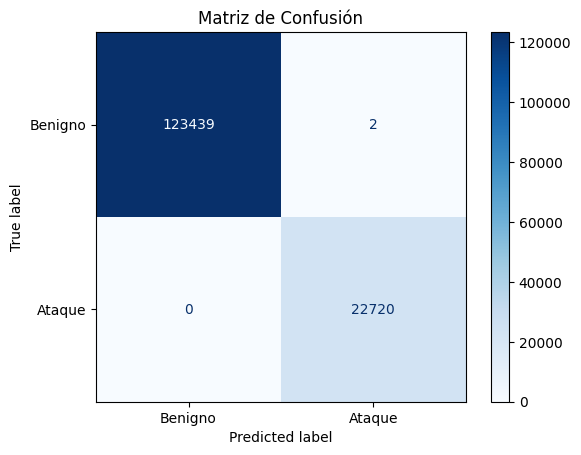

In [78]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,          #Mejores parametros obtenidos con Gripsearch
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


print("Reporte de Clasificación:")
print(classification_report(y_test, rf.predict(X_test)))

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test,
                                    display_labels=['Benigno', 'Ataque'],
                                    cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()

In [80]:
# Modelo entrenado con la totalidad de los datos
final_model = RandomForestClassifier(
    n_estimators=150,  # Balance entre rendimiento y velocidad
    max_depth=15,
    min_samples_split=5,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Entrenamiento con todos los datos disponibles
final_model.fit(X, y)

# Guardado para producción

joblib.dump(final_model, 'modelo_ddos_produccion.pkl')

['modelo_ddos_produccion.pkl']

# PRUEBAS

In [133]:
def simular_flujo(df, n=10):

    muestras = df.sample(n).reset_index(drop=True)
    X = muestras.drop(columns='Label')
    y = muestras['Label'].values
    return X, y

In [134]:
def detectar_ataque(modelo, X):

    predicciones = modelo.predict(X)
    return predicciones

In [138]:
X_simulados, etiquetas_reales = simular_flujo(data, n=10)

# Detectar con el modelo entrenado
predicciones = detectar_ataque(final_model, X_simulados)

# Mostrar resultados
for i in range(len(predicciones)):
    print(f"  Muestra {i+1}")
    print(f"   ▶ Predicción: {predicciones[i]}")
    print(f"   ▶ Real:       {etiquetas_reales[i]}")
    print()

  Muestra 1
   ▶ Predicción: 0
   ▶ Real:       0

  Muestra 2
   ▶ Predicción: 0
   ▶ Real:       0

  Muestra 3
   ▶ Predicción: 1
   ▶ Real:       1

  Muestra 4
   ▶ Predicción: 0
   ▶ Real:       0

  Muestra 5
   ▶ Predicción: 0
   ▶ Real:       0

  Muestra 6
   ▶ Predicción: 1
   ▶ Real:       1

  Muestra 7
   ▶ Predicción: 0
   ▶ Real:       0

  Muestra 8
   ▶ Predicción: 1
   ▶ Real:       1

  Muestra 9
   ▶ Predicción: 0
   ▶ Real:       0

  Muestra 10
   ▶ Predicción: 0
   ▶ Real:       0



In [139]:
def generar_datos_sinteticos(n=100):

    data = {
        'Dst Port': np.random.choice([21, 22], size=n, p=[0.5, 0.5]),
        'Protocol': np.random.choice([0, 6, 17], size=n, p=[0.33, 0.34, 0.33]),  # dataset el valor es 6 casi siempre
        'Flow Duration': np.random.exponential(scale=90000, size=n).astype(int),
        'Tot Fwd Pkts': np.random.randint(1, 29, size=n),
        'Tot Bwd Pkts': np.random.randint(0, 23, size=n),
        'TotLen Fwd Pkts': np.random.uniform(0, 2024, size=n),
        'Fwd Pkt Len Mean': np.random.uniform(0, 106, size=n),
        'Flow Pkts/s': np.random.uniform(50, 1_000_000, size=n),
        'Label': [0] * n  # todos benignos
    }

    return pd.DataFrame(data)

In [140]:
def procesar_datos_en_vivo(modelo, datos):
    for i, fila in datos.iterrows():
        entrada = pd.DataFrame([fila.drop('Label')])
        prediccion = modelo.predict(entrada)[0]

        if prediccion == 1:
            print(f"[-] Ataque detectado en fila {i} - Simulando bloqueo de IP...")
        else:
            print(f"[+] Tráfico benigno en fila {i}")

In [141]:
datos_prueba = generar_datos_sinteticos(n=10)
procesar_datos_en_vivo(final_model, datos_prueba)


[-] Ataque detectado en fila 0 - Simulando bloqueo de IP...
[-] Ataque detectado en fila 1 - Simulando bloqueo de IP...
[+] Tráfico benigno en fila 2
[-] Ataque detectado en fila 3 - Simulando bloqueo de IP...
[-] Ataque detectado en fila 4 - Simulando bloqueo de IP...
[-] Ataque detectado en fila 5 - Simulando bloqueo de IP...
[+] Tráfico benigno en fila 6
[+] Tráfico benigno en fila 7
[-] Ataque detectado en fila 8 - Simulando bloqueo de IP...
[-] Ataque detectado en fila 9 - Simulando bloqueo de IP...


In [161]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(df2['Protocol'].unique())


# Crear el dataframe con columnas en el orden del modelo
df_model_input = pd.DataFrame()
df_model_input['Dst Port'] = df2['port_no']
df_model_input['Protocol'] = df2['Protocol']
df_model_input['Flow Duration'] = df2['tot_duration']
df_model_input['Tot Fwd Pkts'] = df2['pkt_count']
df_model_input['Tot Bwd Pkts'] = df2['flows']
df_model_input['TotLen Fwd Pkts'] = df2['byte_count']
df_model_input['Fwd Pkt Len Mean'] = df2['byte_per_flow']
df_model_input['Flow Pkts/s'] = df2['pkt_rate']

# Extraer etiquetas reales
y_true = df2['label'].astype(int).values

# Predecir usando el modelo entrenado
y_pred = final_model.predict(df_model_input.values)

# Evaluar rendimiento
print("Accuracy:", accuracy_score(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred))
print("\nMatriz de Confusión:\n", confusion_matrix(y_true, y_pred))


[ 0  6 17]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.49895810981570227

Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67    523195
           1       0.00      0.00      0.00    525380

    accuracy                           0.50   1048575
   macro avg       0.25      0.50      0.33   1048575
weighted avg       0.25      0.50      0.33   1048575


Matriz de Confusión:
 [[523195      0]
 [525380      0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
